In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## DESCRIPTIVE STADISTICS AND DATA VISUALIZATION

In [2]:
clindata = pd.read_csv('/Users/laiacoronassala/Desktop/VHIO/codisdef/clinical_biological_db_20230905.csv')
clindata.columns

Index(['Unnamed: 0', 'patient_id', 'DB', 'sex', 'DOB', 'EOT_reason',
       'primary_tlocation', 'BL_CT_date', 'first_CT_date', 'BR_CT_date',
       'PD_CT_date', 'RECIST', 'trial_start_date', 'PFS_months', 'OS_months',
       'last_FU', 'cb_5mo', 'cb_4mo', 'status_at_last_FU', 'n_lesions',
       'n_loc_lesions', 'age', 'cb_PFS', 'treatment', 'total_seg_vol',
       'PFS_censored', 'liver_met', 'baseline_lymphos', 'baseline_neutroph',
       'baseline_leucocytes', 'baseline_platelets', 'baseline_albumin',
       'baseline_LDH', 'baseline_num_met_organs', 'baseline_ECOG'],
      dtype='object')

In [3]:
cols = ['patient_id','sex','primary_tlocation','n_lesions','age','treatment','total_seg_vol',
        'liver_met','baseline_lymphos', 'baseline_neutroph',
       'baseline_leucocytes', 'baseline_platelets', 'baseline_albumin',
       'baseline_LDH', 'baseline_num_met_organs', 'baseline_ECOG', 'cb_4mo']
clindata = clindata[cols]
clindata

,patient_id,sex,primary_tlocation,n_lesions,age,treatment,total_seg_vol,liver_met,baseline_lymphos,baseline_neutroph,baseline_leucocytes,baseline_platelets,baseline_albumin,baseline_LDH,baseline_num_met_organs,baseline_ECOG,cb_4mo
0,14947437,female,ovary,10,72,combo immuno,47417.902780,0,2.0,3.4,6.29,302.0,3.1,418.0,1.0,1.0,1
1,10049517,male,esophagus,3,61,combo immuno,54198.513890,0,3.0,5.0,9.00,189.0,4.1,377.0,2.0,0.0,1
2,10262640,male,kidney,4,50,combo immuno,40001.152770,1,1.6,4.6,7.12,224.0,3.8,323.0,3.0,1.0,0
3,10599018,male,head_and_neck,4,54,combo immuno,8589.875000,0,2.2,3.2,6.10,217.0,4.6,446.0,3.0,0.0,1
4,10897916,female,skin,3,58,combo immuno,27891.166660,0,2.0,2.4,4.93,298.0,4.1,283.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,18895067,male,liver,1,37,monotherapy,238646.916700,0,1.0,3.6,5.31,256.0,4.3,415.0,2.0,0.0,1
182,19309727,female,cervix,1,45,monotherapy,4228.861111,0,1.0,2.8,4.21,171.0,3.8,318.0,2.0,1.0,1
183,260626,female,pleura,1,65,monotherapy,1860.968750,0,1.1,4.0,6.12,455.0,3.2,443.0,3.0,0.0,1
184,412386,female,cervix,2,67,monotherapy,13703.305550,0,1.0,4.4,6.04,275.0,3.9,NaN,2.0,0.0,1


In [4]:
#Counting
print("Number of unique patients: ", clindata['patient_id'].nunique())
print("Sex:", clindata['sex'].value_counts())
print("tumor locations:", clindata['primary_tlocation'].value_counts())
print("Resposta:", clindata['cb_4mo'].value_counts())


Number of unique patients:  186
Sex: sex
male      115
female     71
Name: count, dtype: int64
tumor locations: primary_tlocation
lung             50
colorectal       19
skin             18
breast           13
cervix           12
head_and_neck    11
bladder           9
ovary             7
thyroid           6
adrenal           6
esophagus         5
stomach           5
pleura            4
bone              4
kidney            4
liver             3
pancreas          3
UGE               2
thymus            2
NSCLC             1
biliary_tract     1
penis             1
Name: count, dtype: int64
Resposta: cb_4mo
0    102
1     84
Name: count, dtype: int64


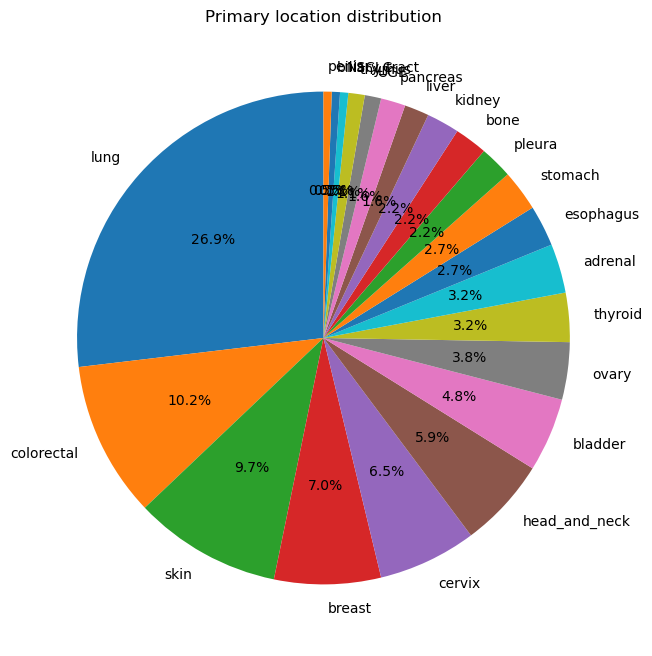

In [5]:
import matplotlib.pyplot as plt
loc = clindata['primary_tlocation'].value_counts()
loc.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 8))
plt.title('Primary location distribution')
plt.ylabel('')
plt.show()

## PREPROCESSING

In [6]:
clindata.columns

Index(['patient_id', 'sex', 'primary_tlocation', 'n_lesions', 'age',
       'treatment', 'total_seg_vol', 'liver_met', 'baseline_lymphos',
       'baseline_neutroph', 'baseline_leucocytes', 'baseline_platelets',
       'baseline_albumin', 'baseline_LDH', 'baseline_num_met_organs',
       'baseline_ECOG', 'cb_4mo'],
      dtype='object')

In [7]:
y = clindata['cb_4mo']
patients = clindata[['patient_id']]
toscale = clindata[['n_lesions', 'age','total_seg_vol', 'liver_met', 'baseline_lymphos',
       'baseline_neutroph', 'baseline_leucocytes', 'baseline_platelets',
       'baseline_albumin', 'baseline_LDH', 'baseline_num_met_organs',
       'baseline_ECOG']]
binary = clindata[['sex','treatment',]]
categorical = clindata[['primary_tlocation']]

In [12]:
#fill NAs
#clindata.isna().sum()
for column in toscale.columns:
    #if pd.api.types.is_numeric_dtype(df[columna]):
        mean = toscale[column].mean()
        toscale[column] = toscale[column].fillna(mean)

#scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(toscale)
scaled = pd.DataFrame(scaled, columns=toscale.columns)

#encoding
le = LabelEncoder()
binary['sex'] = le.fit_transform(binary['sex']) # 1 es male i 0 es female
binary['treatment'] = le.fit_transform(binary['treatment']) 

#onehotencoding - threshold a 10
primarytumor = ['lung','colorectal','skin','breast','cervix','head_and_neck']
categorical = ['other' if category not in primarytumor else category for category in categorical]


/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_8720/1598310379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toscale[column] = toscale[column].fillna(mean)
/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_8720/1598310379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary['sex'] = le.fit_transform(binary['sex']) # 1 es male i 0 es female
/var/folders/r_/_x49m5kn0v98s1f52zqmrt1m0000gn/T/ipykernel_8720/1598310379.py:16: SettingWithCopyWarning: 
A value is trying to be set o

In [11]:
toscale

,n_lesions,age,total_seg_vol,liver_met,baseline_lymphos,baseline_neutroph,baseline_leucocytes,baseline_platelets,baseline_albumin,baseline_LDH,baseline_num_met_organs,baseline_ECOG
0,10,72,47417.902780,0,2.0,3.4,6.29,302.0,3.1,418.0,1.0,1.0
1,3,61,54198.513890,0,3.0,5.0,9.00,189.0,4.1,377.0,2.0,0.0
2,4,50,40001.152770,1,1.6,4.6,7.12,224.0,3.8,323.0,3.0,1.0
3,4,54,8589.875000,0,2.2,3.2,6.10,217.0,4.6,446.0,3.0,0.0
4,3,58,27891.166660,0,2.0,2.4,4.93,298.0,4.1,283.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,37,238646.916700,0,1.0,3.6,5.31,256.0,4.3,415.0,2.0,0.0
182,1,45,4228.861111,0,1.0,2.8,4.21,171.0,3.8,318.0,2.0,1.0
183,1,65,1860.968750,0,1.1,4.0,6.12,455.0,3.2,443.0,3.0,0.0
184,2,67,13703.305550,0,1.0,4.4,6.04,275.0,3.9,NaN,2.0,0.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataheat = scaled[['n_lesions','n_loc_lesions','tot_vol']]

correlation_matrix = dataheat.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()